In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
df= pd.read_csv('hcvdat0.csv')
x=pd.read_csv('hcvdat0.csv')
df=df.drop('Unnamed: 0', axis=1)
df.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [32]:
df=df.fillna(df.mean())

In [33]:
df.values

array([['0=Blood Donor', 32, 'm', ..., 106.0, 12.1, 69.0],
       ['0=Blood Donor', 32, 'm', ..., 74.0, 15.6, 76.5],
       ['0=Blood Donor', 32, 'm', ..., 86.0, 33.2, 79.3],
       ...,
       ['3=Cirrhosis', 64, 'f', ..., 66.7, 64.2, 82.0],
       ['3=Cirrhosis', 46, 'f', ..., 52.0, 50.0, 71.0],
       ['3=Cirrhosis', 59, 'f', ..., 67.0, 34.0, 68.0]], dtype=object)

In [34]:
col=['ALP', 'ALT','CHE', 'AST']
x=df[col]
x=x.loc[0:10]
x

,ALP,ALT,CHE,AST
0,52.5,7.7,6.93,22.1
1,70.3,18.0,11.17,24.7
2,74.7,36.2,8.84,52.6
3,52.0,30.6,7.33,22.6
4,74.1,32.6,9.15,24.8
5,43.3,18.5,9.92,19.7
6,41.3,17.5,7.01,17.8
7,41.9,35.8,5.82,31.1
8,65.5,23.2,8.69,21.2
9,86.3,20.3,5.46,20.0


In [8]:
x.style.highlight_max(color='red',axis=0).highlight_min(color='green',axis=0)

,ALP,ALT,CHE,AST
0,52.500000,7.700000,6.930000,22.100000
1,70.300000,18.000000,11.170000,24.700000
2,74.700000,36.200000,8.840000,52.600000
3,52.000000,30.600000,7.330000,22.600000
4,74.100000,32.600000,9.150000,24.800000
5,43.300000,18.500000,9.920000,19.700000
6,41.300000,17.500000,7.010000,17.800000
7,41.900000,35.800000,5.820000,31.100000
8,65.500000,23.200000,8.690000,21.200000
9,86.300000,20.300000,5.460000,20.000000


In [35]:
for k in ['ALB', 'ALT','ALP', 'AST','BIL', 'CHE', 'CHOL','CREA','GGT','PROT']:
    max = float(df[k].max())
    min = float(df[k].min())
    for i in range(0, 615):
        df[k][i] = (float(df[k][i]) - min)/(max - min)
dic={'m':1,'f':0}
df['Sex']=df['Sex'].apply(lambda x: dic[x])
df

<ipython-input-35-abb578947b06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[k][i] = (float(df[k][i]) - min)/(max - min)


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,1,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398
1,0=Blood Donor,32,1,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327
2,0=Blood Donor,32,1,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274
3,0=Blood Donor,32,1,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628
4,0=Blood Donor,32,1,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,0,0.254086,1.000000,0.015413,0.318124,0.194313,0.276851,0.591019,0.044534,1.000000,0.524336
611,3=Cirrhosis,64,0,0.135215,0.225759,0.006165,0.107849,0.075829,0.008005,0.192961,0.051349,0.048577,0.586283
612,3=Cirrhosis,64,0,0.209510,0.187515,0.008015,0.282068,0.186414,0.016011,0.266990,0.054803,0.092358,0.823009
613,3=Cirrhosis,46,0,0.268945,0.140597,0.117448,0.164008,0.075829,0.142762,0.336165,0.041079,0.070390,0.579646


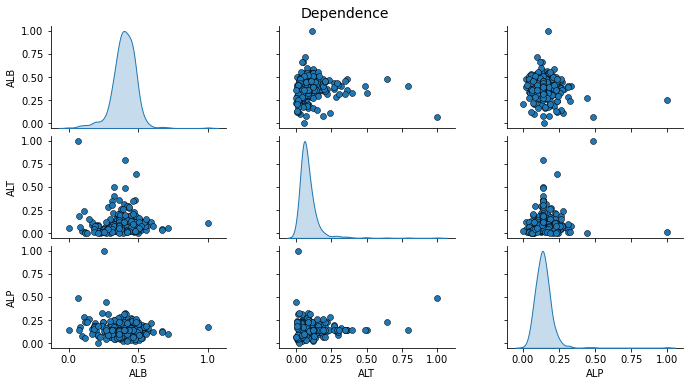

In [10]:
import seaborn as sns
cols=['ALB', 'ALT','ALP']
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Dependence', fontsize=14)

Category


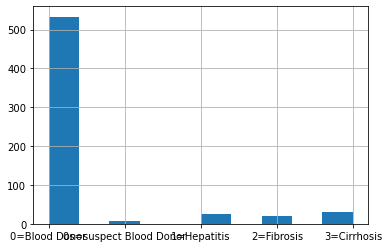

Age


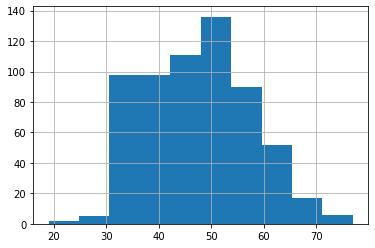

Sex


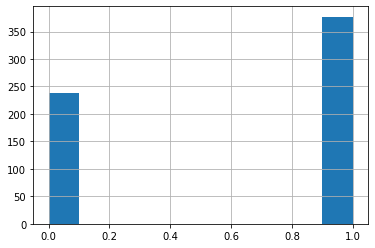

ALB


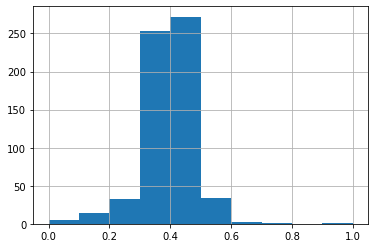

ALP


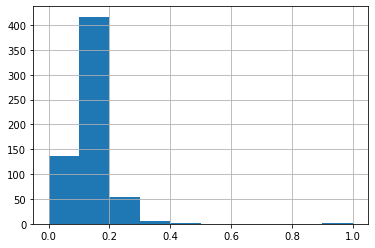

ALT


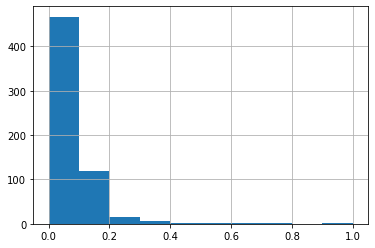

AST


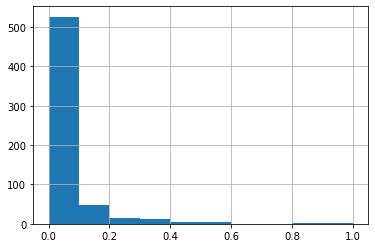

BIL


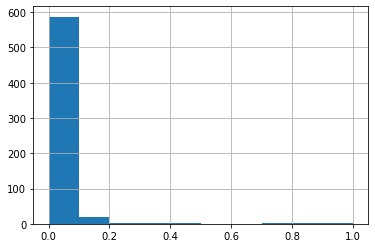

CHE


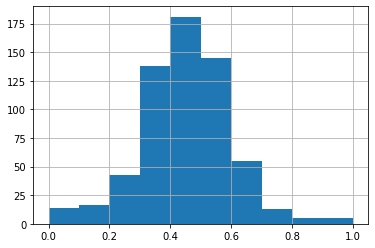

CHOL


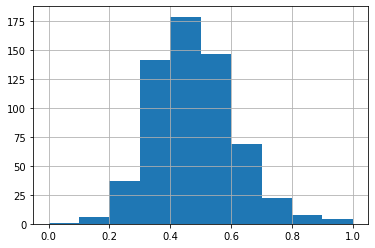

CREA


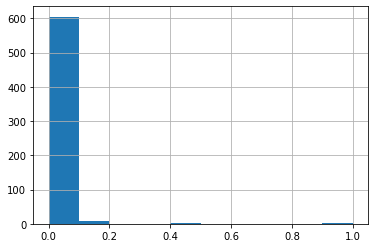

GGT


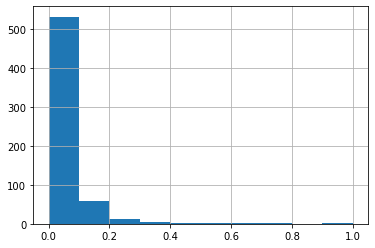

PROT


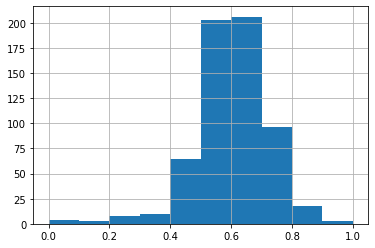

In [11]:
for col_name in df.columns.values:
  print(col_name)
  df[col_name].hist()
  plt.show()

In [12]:
df.corr(method='pearson')

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.024544,-0.197005,0.168473,-0.006017,0.088666,0.032492,-0.075093,0.123978,-0.022296,0.153087,-0.153665
Sex,-0.024544,1.000000,0.146065,-0.019547,0.161785,0.130891,0.111177,0.169111,-0.029886,0.159589,0.133276,0.051250
ALB,-0.197005,0.146065,1.000000,-0.138858,0.001606,-0.193397,-0.221650,0.375848,0.204803,-0.001573,-0.155555,0.550033
ALP,0.168473,-0.019547,-0.138858,1.000000,0.172461,0.062202,0.048600,0.032971,0.121914,0.149554,0.442262,-0.053633
ALT,-0.006017,0.161785,0.001606,0.172461,1.000000,0.273325,-0.038468,0.146953,0.068023,-0.043025,0.248086,0.094373
AST,0.088666,0.130891,-0.193397,0.062202,0.273325,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263,0.039888
BIL,0.032492,0.111177,-0.221650,0.048600,-0.038468,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024,-0.041309
CHE,-0.075093,0.169111,0.375848,0.032971,0.146953,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345,0.293184
CHOL,0.123978,-0.029886,0.204803,0.121914,0.068023,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828,0.206546
CREA,-0.022296,0.159589,-0.001573,0.149554,-0.043025,-0.021387,0.031224,-0.011157,-0.047667,1.000000,0.121003,-0.031693


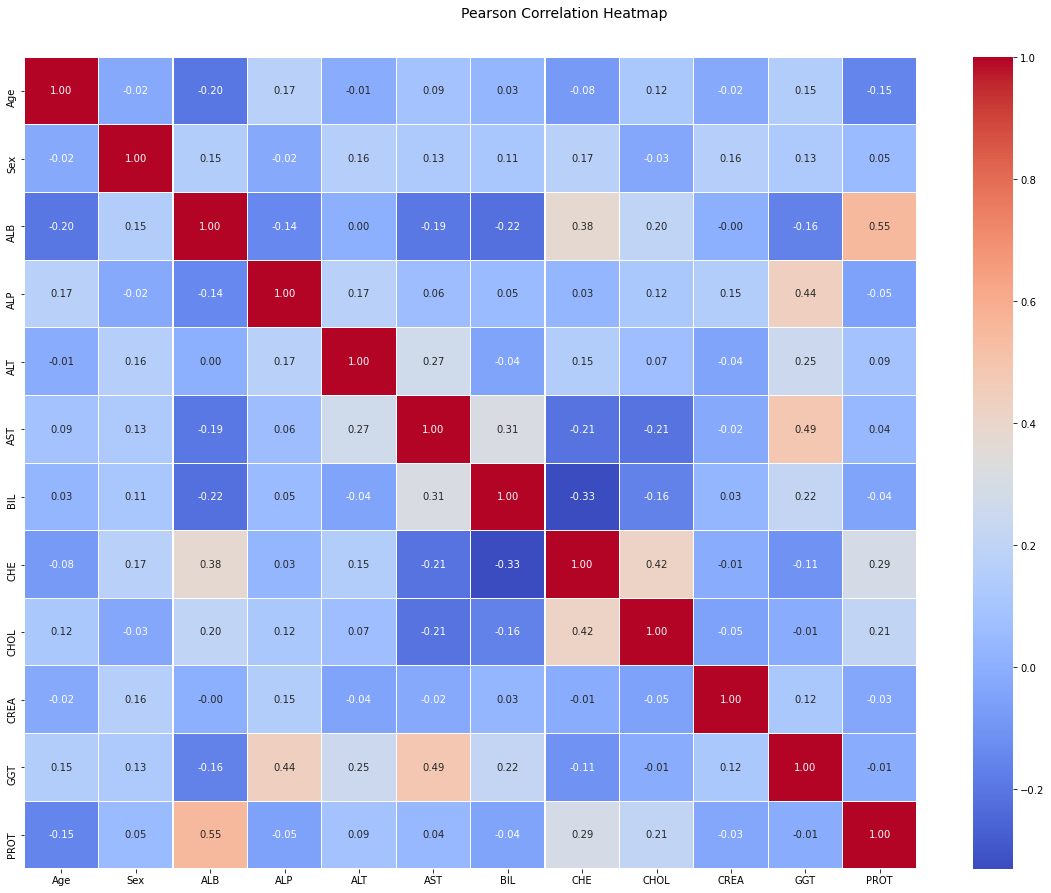

In [13]:
f, ax = plt.subplots(figsize=(20, 14))
corr = df.corr(method='pearson')
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=0.025)
f.subplots_adjust(top=0.93)
t= f.suptitle('Pearson Correlation Heatmap', fontsize=14)

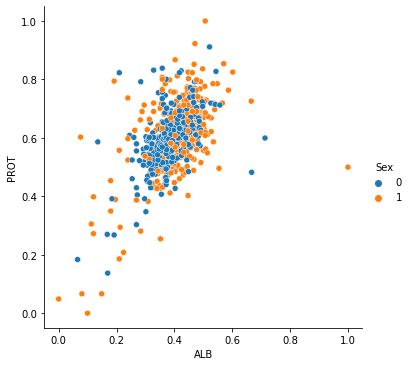

In [15]:
sns.relplot(data=df, x='ALB', y='PROT', hue='Sex')

D:\python+anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, '19'),
  Text(1, 0, '23'),
  Text(2, 0, '25'),
  Text(3, 0, '27'),
  Text(4, 0, '29'),
  Text(5, 0, '30'),
  Text(6, 0, '32'),
  Text(7, 0, '33'),
  Text(8, 0, '34'),
  Text(9, 0, '35'),
  Text(10, 0, '36'),
  Text(11, 0, '37'),
  Text(12, 0, '38'),
  Text(13, 0, '39'),
  Text(14, 0, '40'),
  Text(15, 0, '41'),
  Text(16, 0, '42'),
  Text(17, 0, '43'),
  Text(18, 0, '44'),
  Text(19, 0, '45'),
  Text(20, 0, '46'),
  Text(21, 0, '47'),
  Text(22, 0, '48'),
  Text(23, 0, '49'),
  Text(24, 0, '50'),
  Text(25, 0, '51'),
  Text(26, 0, '52'),
  Text(27, 0, '53'),
  Text(28, 0, '54'),
  Text(29, 0, '55'),
  Text(30, 0, '56'),
  Text(31, 0, '57'),
  Text(32, 0, '58'),
  Text(33, 0, '59'),
  Text(34, 0, '60'),
  Text(35, 0, '61'),
  Text(36, 0, '62'),
  Text(37, 

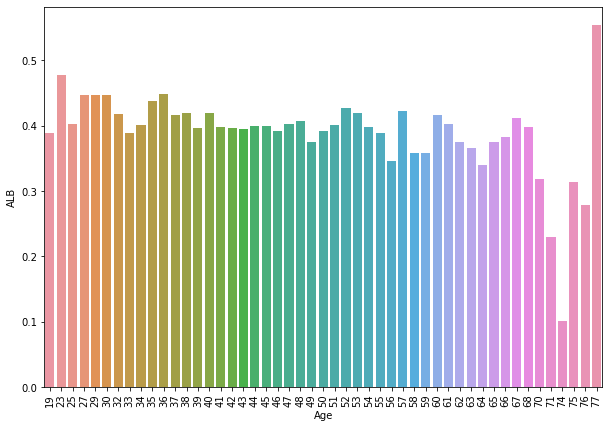

In [64]:
plt.figure(figsize=(10,7))
sns.barplot(df['Age'], df['ALB'], ci=None)
plt.xticks(rotation=90)


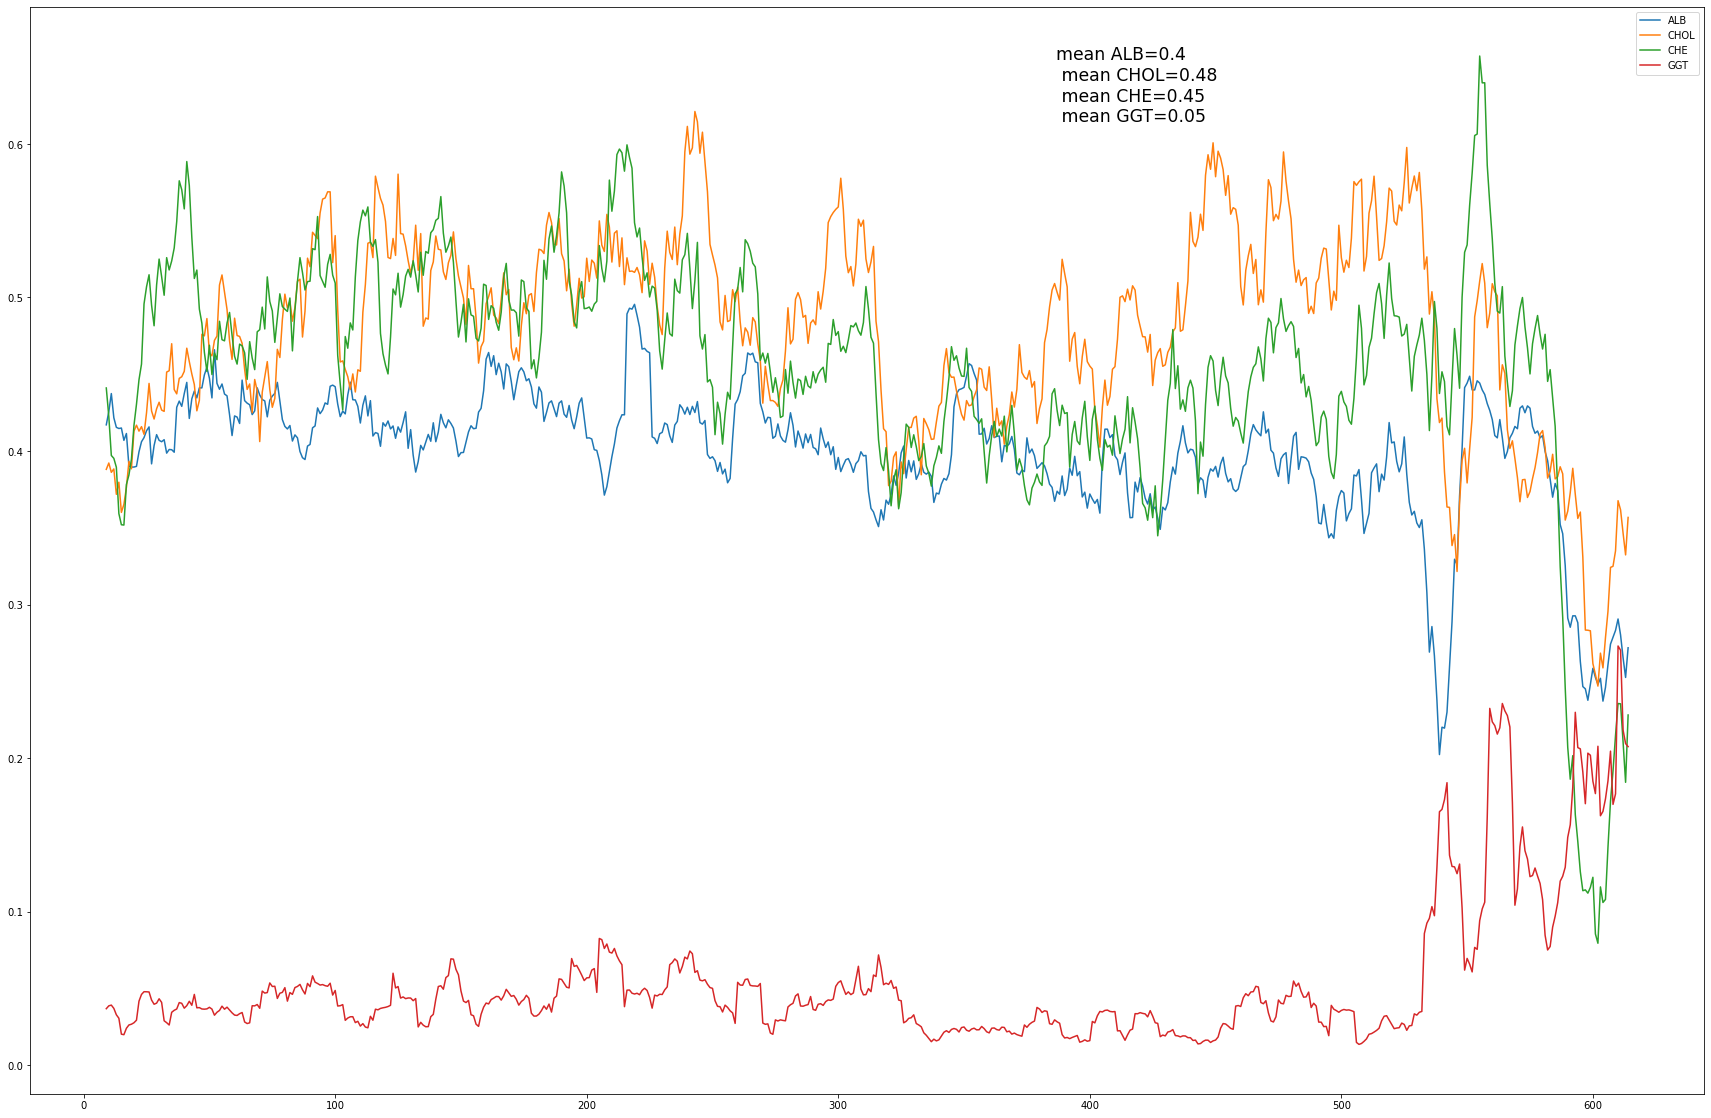

In [20]:
fig=plt.figure(figsize=(30,20))
plt.plot(df['ALB'].rolling(window=10).mean(), label='ALB')
plt.plot(df['CHOL'].rolling(window=10).mean(), label='CHOL')
plt.plot(df['CHE'].rolling(window=10).mean(), label='CHE')
plt.plot(df['GGT'].rolling(window=10).mean(), label='GGT')
plt.figtext(.6,.8, f'mean ALB={round(df.ALB.mean(),2)}\n mean CHOL={round(df.CHOL.mean(),2)}\n mean CHE={round(df.CHE.mean(),2)}\n mean GGT={round(df.GGT.mean(),2)}',fontsize='xx-large')

plt.legend()
plt.show()

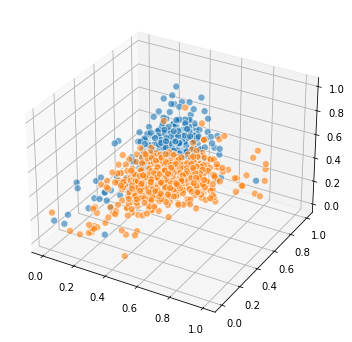

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['ALB']
ys = df['PROT']
zs = df['CHOL']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
ax.scatter(df['CHOL'],df['CHE'], df['ALB'], s=50, alpha=0.6, edgecolors='w')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [36]:
temp=df.copy()

In [44]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()
]


In [39]:
from sklearn import preprocessing
l = preprocessing.LabelEncoder()
l.fit(temp['Category'])
y=l.transform(temp['Category'])
X=temp.drop('Category',axis=1)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [58]:
from sklearn.model_selection import cross_val_score
res=pd.DataFrame(columns=['Classifarier','Mean error'])
k=0
for i in classifiers:
    res=res.append({'Classifarier':names[k],'Mean error':(cross_val_score(i, X, y, cv=5)).mean()},ignore_index=True)
    k+=1

D:\python+anaconda\lib\site-packages\sklearn\gaussian_process\_gpc.py:446: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [60]:
res.sort_values(by='Mean error', ascending=False)


,Classifarier,Mean error
5,Random Forest,0.904065
6,Neural Net,0.900813
4,Decision Tree,0.897561
7,AdaBoost,0.897561
8,Naive Bayes,0.891057
1,Linear SVM,0.866667
3,Gaussian Process,0.850407
0,Nearest Neighbors,0.830894
2,RBF SVM,0.764228
